<a href="https://colab.research.google.com/github/nhs-pycom/coding-club-trashPanda/blob/main/coding-club_complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to NHSX Coding Club

## Lesson One: trashPanda

### Pandas for excel

In [1]:
# clone coding club repo to google colab
!git clone -l -s git://github.com/nhs-pycom/coding-club-trashPanda.git cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 39 (delta 13), reused 21 (delta 7), pack-reused 0
Receiving objects: 100% (39/39), 65.08 KiB | 380.00 KiB/s, done.
Resolving deltas: 100% (13/13), done.
/content/cloned-repo
coding-club.ipynb  data  LICENSE  README.md


In [9]:
import pandas as pd
pd.set_option("display.max.columns", None) # show all columns in dataframe

# read an excel file from repo /data/ folder
path = '/content/cloned-repo/data/tabular structure/Q1 Returns/Jan 2021.xlsx'
df = pd.read_excel(path)
df.head()

,Org name:,Population:,Number of users:,Completed by:,Number of deployments:,Number of unique users:,Area name:,Number of records:,Number of views:,Date completed:,Number of errors:
0,NHS CCG80,5028324,7580834,User51,573766,7916889,LA19,4836331,75242,2021-01-01,4337039
1,NHS CCG30,5576609,6015460,User18,9008336,5566608,LA82,1071840,8327830,2021-01-02,1235495
2,NHS CCG14,7003085,3030247,User13,4766644,2736534,LA69,1595565,8780011,2021-01-03,9508660
3,NHS CCG79,6442678,917949,User35,9251515,8881993,LA42,5903625,3382736,2021-01-04,9574924
4,NHS CCG88,6086618,7182337,User62,2341285,3065153,LA38,5014954,7751733,2021-01-05,9415369


In [10]:
# specify which sheet to load and index column number (remember index starts at 0 in python)
df = pd.read_excel(path, sheet_name=0, index_col=0)
df.head()

,Population:,Number of users:,Completed by:,Number of deployments:,Number of unique users:,Area name:,Number of records:,Number of views:,Date completed:,Number of errors:
Org name:,,,,,,,,,,
NHS CCG80,5028324,7580834,User51,573766,7916889,LA19,4836331,75242,2021-01-01,4337039
NHS CCG30,5576609,6015460,User18,9008336,5566608,LA82,1071840,8327830,2021-01-02,1235495
NHS CCG14,7003085,3030247,User13,4766644,2736534,LA69,1595565,8780011,2021-01-03,9508660
NHS CCG79,6442678,917949,User35,9251515,8881993,LA42,5903625,3382736,2021-01-04,9574924
NHS CCG88,6086618,7182337,User62,2341285,3065153,LA38,5014954,7751733,2021-01-05,9415369


In [21]:
print(type(df))
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
(11, 10)


In [15]:
# basic transformations
sort_population = df.sort_values(['Population:'], ascending=False)
sort_population['Population:']

Org name:
NHS CCG29    7123329
NHS CCG14    7003085
NHS CCG79    6442678
NHS CCG88    6086618
NHS CCG30    5576609
NHS CCG21    5474666
NHS CCG80    5028324
NHS CCG96    4481652
NHS CCG87    3907967
NHS CCG55    3079321
NHS CCG53    2409241
Name: Population:, dtype: int64

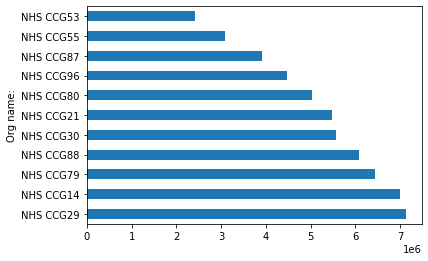

In [16]:
import matplotlib.pyplot as plt

# bar chart
sort_population['Population:'].plot(kind="barh")
plt.show()

In [20]:
# discriptive statistics
sort_population['Population:'].describe()

count    1.100000e+01
mean     5.146681e+06
std      1.548132e+06
min      2.409241e+06
25%      4.194810e+06
50%      5.474666e+06
75%      6.264648e+06
max      7.123329e+06
Name: Population:, dtype: float64

In [ ]:
# import some libs
import os
from datetime import datetime
from fnmatch import fnmatch
import pandas as pd
from openpyxl import load_workbook

In [ ]:
df = pd.DataFrame(
    columns=[
        "file",
        "mod_date",
        "sheet",
        "Author",
        "Date completed",
        "Population",
        "Number of ",
        "Number of ",
        "Number of ",
        "Number of ",
    ]
)
df

In [ ]:
path = "data/"
my_filenames = [
    os.path.join(root, name)
    for root, dirs, files in os.walk(path)
    for name in files
    if name.endswith((".xlsx"))
]
my_filenames

In [ ]:
for filename in my_filenames:
    wb = load_workbook(filename)
    sheet_list = [sheet for sheet in wb.sheetnames if fnmatch(sheet, "*Data*")]
sheet_list

In [ ]:
# last modified datex
time_stamp = os.path.getmtime(my_filenames[1])
print(time_stamp)

In [ ]:
# last modified date
mod_date = datetime.fromtimestamp(time_stamp).strftime("%Y-%m-%d")
print(mod_date)

In [ ]:
sheet_title = wb[sheet_list[1]].title
print(sheet_title)

In [ ]:
cell_value = wb[sheet_list[1]]["B2"].value
print(cell_value)

In [ ]:
df1 = df.append(
    {
        "file": my_filenames[1],
        "mod_date": mod_date,
        "sheet": wb[sheet_list[1]].title,
        "Author": wb[sheet_list[1]]["F1"].value,
        "Date completed": wb[sheet_list[1]]["H1"].value,
        "Population": wb[sheet_list[1]]["B2"].value,
        "Number of ": wb[sheet_list[1]]["E2"].value,
        "Number of ": wb[sheet_list[1]]["B3"].value,
        "Number of ": wb[sheet_list[1]]["D3"].value,
        "Number of ": wb[sheet_list[1]]["F3"].value,
    },
    ignore_index=True,
)
df1

In [ ]:
# loop
for filename in my_filenames:
    wb = load_workbook(filename)
    sheet_list = [sheet for sheet in wb.sheetnames if fnmatch(sheet, "*Data*")]
    # last modified date
    mod_date = datetime.fromtimestamp(os.path.getmtime(filename)).strftime("%Y-%m-%d")
    for sheet in sheet_list:
        df2 = df.append(
            {
                "file": filename,
                "mod_date": mod_date,
                "sheet": wb[sheet].title,
                "Author": wb[sheet]["F1"].value,
                "Date completed": wb[sheet]["H1"].value,
                "Population": wb[sheet]["B2"].value,
                "Number of ": wb[sheet]["E2"].value,
                "Number of ": wb[sheet]["B3"].value,
                "Number of ": wb[sheet]["D3"].value,
                "Number of ": wb[sheet]["F3"].value,
            },
            ignore_index=True,
        )
df2

In [ ]:
import os
import yaml
import pandas as pd
from openpyxl import load_workbook
from datetime import datetime
from fnmatch import fnmatch
from fuzzywuzzy import process
from fuzzywuzzy import fuzz

config = 'config.yaml'
with open(config, "r") as yamlfile:
    configs = yaml.load(yamlfile, Loader=yaml.FullLoader)

path = "data/"
df = pd.DataFrame(columns=configs['Column Names'])
dictionary = {}
limit = 1   # Number of results to return
cutoff = 80 # % similarity

my_filenames = [
    os.path.join(root, name)
    for root, dirs, files in os.walk(path)
    for name in files
    if name.endswith((".xlsx"))
]
# loop files
for filename in my_filenames:
    wb = load_workbook(filename)
    dictionary["file"] = filename
    sheet_list = [sheet for sheet in wb.sheetnames if fnmatch(sheet, configs["Sheet"])]
    # last modified date
    mod_date = datetime.fromtimestamp(os.path.getmtime(filename))
    dictionary["Modified date"] = mod_date
    # loop sheets
    for sheet in sheet_list:
        dictionary["sheet"] = sheet
        df_sheet = pd.read_excel(
            filename,
            sheet_name=sheet,
            engine="openpyxl",
            index_col=None,
            header=None,
            nrows=configs["Rows"],
        )
        for row in list(range(0, configs["Rows"])):
            for name in configs['Column Names']:
                match = process.extractBests(
                    name,
                    df_sheet.iloc[row],
                    limit=limit,
                    scorer=fuzz.token_sort_ratio,
                    score_cutoff=cutoff,
                )
                if match:
                    location = [i for i, x in enumerate(df_sheet.iloc[row] == match[0][0]) if x]
                    result = df_sheet.iloc[row][location[0] + 1]
                    dictionary[name] = result
        df = df.append(dictionary, ignore_index=True)
df

In [ ]:
# call function
path = "data/"
df = trashPanda(path)
df.to_csv(r'data/output.csv')